In [1]:
import numpy as np
import pandas as pd
import math

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option("display.max_columns", None)
plt.style.use('seaborn-v0_8')
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15

In [3]:
data_path = r"D:\RideWise-Predicting-Bike-sharing-Demand\Data\day.csv"

In [4]:
df = pd.read_csv(r"D:\RideWise-Predicting-Bike-sharing-Demand\Data\day.csv", encoding= 'unicode_escape')

## DATA INSPECTION

In [5]:
print(f' The shape of dataset is {(df.shape)} \n Total Rows are : {(df.shape)[0]}\n Total Columns are : {(df.shape)[1]}')

 The shape of dataset is (731, 16) 
 Total Rows are : 731
 Total Columns are : 16


In [6]:
# Check 1st Five rows
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
# Check last 5 rows
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [8]:
# Check the info of dataset to know the data types of columns or variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [9]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
df.describe(include = 'all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [11]:
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
instant,731.0,NaN,NaN,NaN,366.0,211.165812,1.0,183.5,366.0,548.5,731.0
dteday,731,731,2011-01-01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,731.0,NaN,NaN,NaN,2.49658,1.110807,1.0,2.0,3.0,3.0,4.0
yr,731.0,NaN,NaN,NaN,0.500684,0.500342,0.0,0.0,1.0,1.0,1.0
mnth,731.0,NaN,NaN,NaN,6.519836,3.451913,1.0,4.0,7.0,10.0,12.0
holiday,731.0,NaN,NaN,NaN,0.028728,0.167155,0.0,0.0,0.0,0.0,1.0
weekday,731.0,NaN,NaN,NaN,2.997264,2.004787,0.0,1.0,3.0,5.0,6.0
workingday,731.0,NaN,NaN,NaN,0.683995,0.465233,0.0,0.0,1.0,1.0,1.0
weathersit,731.0,NaN,NaN,NaN,1.395349,0.544894,1.0,1.0,1.0,2.0,3.0
temp,731.0,NaN,NaN,NaN,0.495385,0.183051,0.05913,0.337083,0.498333,0.655417,0.861667


In [12]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [13]:
# Check for duplicates
duplicates = df.duplicated().sum()
if duplicates > 0:
        print(f"Found {duplicates} duplicate rows. Removing them.")
        df = df.drop_duplicates()
else:
        print("No duplicate rows found.")

No duplicate rows found.


In [14]:
# Check for missing values
missing_values = df.isnull().sum().sum()
if missing_values > 0:
    print(f"Found {missing_values} missing values. Handling them.")
    df = df.dropna()  # Drop rows with any missing values
else:
    print("No missing values found.")

No missing values found.


In [15]:
df.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801


In [16]:
df['season'].value_counts()

season
3    188
2    184
1    181
4    178
Name: count, dtype: int64

In [17]:
df['holiday'].value_counts()

holiday
0    710
1     21
Name: count, dtype: int64

In [18]:
df['workingday'].value_counts()

workingday
1    500
0    231
Name: count, dtype: int64

In [19]:
df['mnth'].value_counts()

mnth
1     62
3     62
7     62
5     62
12    62
10    62
8     62
4     60
9     60
6     60
11    60
2     57
Name: count, dtype: int64

### Data Cleaning

In [20]:
# Drop unwanted columns
columns_to_drop = ['instant', 'casual', 'registered','dteday','atemp']
df = df.drop(columns=columns_to_drop)
print(f"Unwanted columns are: {columns_to_drop}")

Unwanted columns are: ['instant', 'casual', 'registered', 'dteday', 'atemp']


In [21]:
display(df.head())

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


In [22]:
#Checking missing values
print(df.isna().sum())

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
hum           0
windspeed     0
cnt           0
dtype: int64


In [23]:
# Create weekend column (1 if weekend, 0 if not weekend)
df['weekend'] = ((df['weekday'] == 0) | (df['weekday'] == 6)).astype(int)
print("Created weekend column (1 for weekend, 0 for weekday)")

Created weekend column (1 for weekend, 0 for weekday)


In [24]:
df['weekend'].value_counts()

weekend
0    521
1    210
Name: count, dtype: int64

In [25]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
predictor_numeric = [c for c in numeric_cols if c != 'cnt']
if df[predictor_numeric].isna().sum().sum() > 0:
    for col in predictor_numeric:
        if df[col].isna().sum() > 0:
            df[col].fillna(df[col].median(), inplace=True)

In [26]:
# categorical vs numeric Columns

candidate_cat = ['season', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit',
                 'year', 'mnth', 'weekend']
#Filter valid categorical columns from dataframe
categorical_cols = [c for c in candidate_cat if c in df.columns and df[c].dtype != 'float64']

#Verify categorical nature based on unique values
categorical_cols = [c for c in categorical_cols if df[c].nunique() <= 20]

# Numeric features: all numeric predictors excluding target and categorical cols
numeric_cols = [c for c in predictor_numeric if c not in categorical_cols]

print("Categorical columns:", categorical_cols)
print("Numeric columns:", numeric_cols)

Categorical columns: ['season', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit', 'mnth', 'weekend']
Numeric columns: ['temp', 'hum', 'windspeed']


In [27]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,weekend
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.627894,0.190486,4504.348837,0.287278
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.142429,0.077498,1937.211452,0.452802
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.000000,0.022392,22.000000,0.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.520000,0.134950,3152.000000,0.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.626667,0.180975,4548.000000,0.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.730209,0.233214,5956.000000,1.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.972500,0.507463,8714.000000,1.000000


## Exploratory Data Analysis


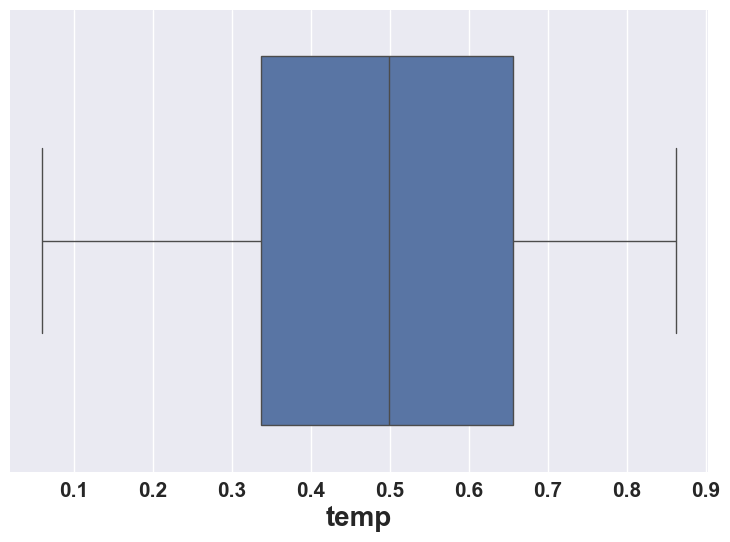

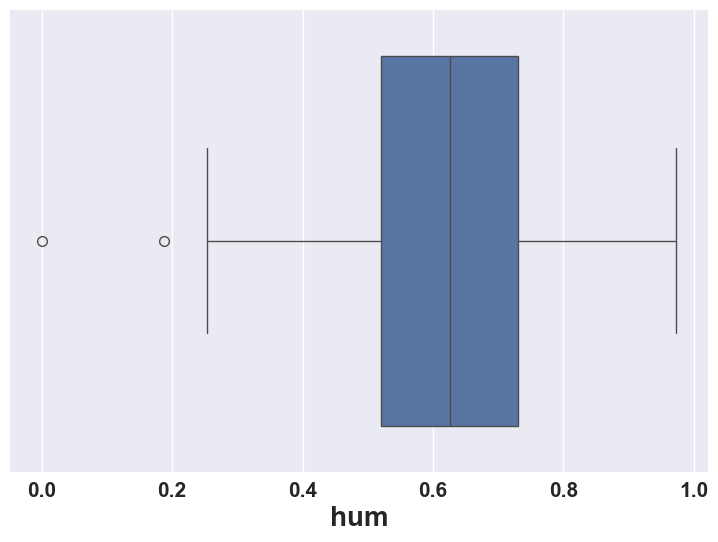

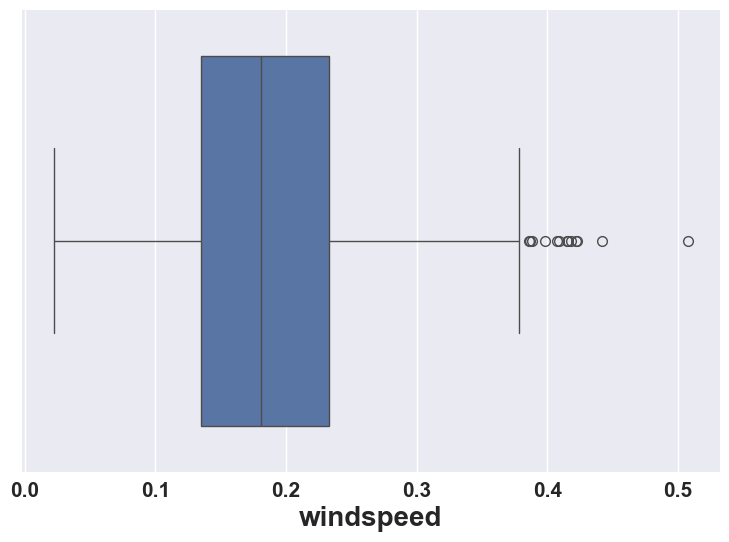

In [28]:
# plotting box plot of numeric columns to check oultliers
for col in numeric_cols:
  fig = plt.figure(figsize = (9,6))
  ax = fig.gca()
  sns.boxplot(x = df[col])

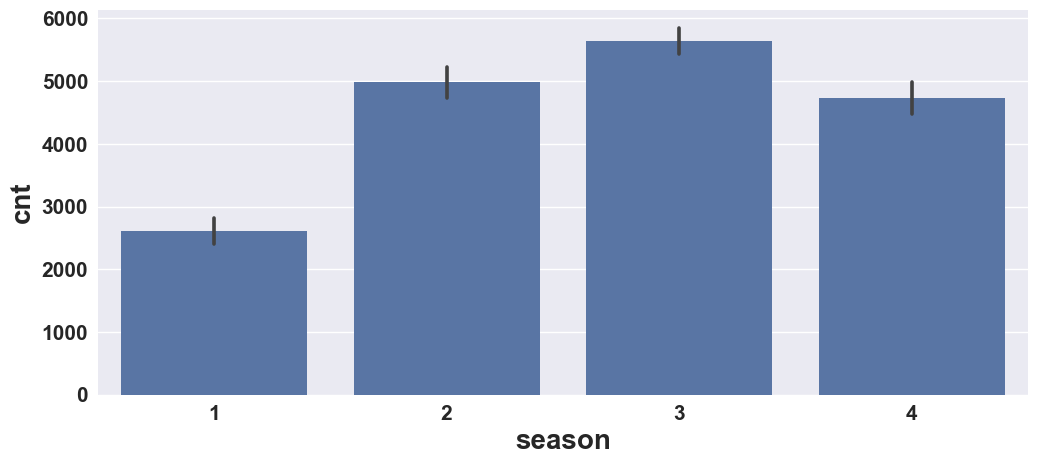

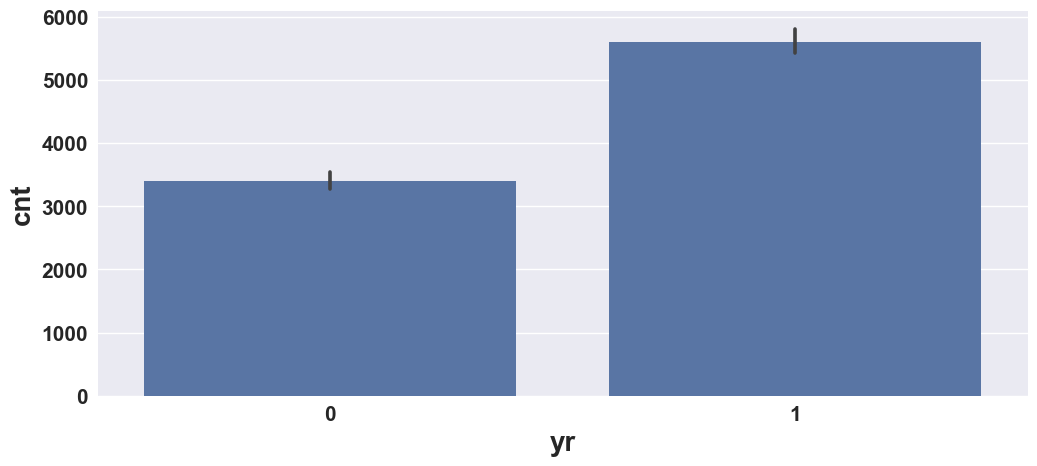

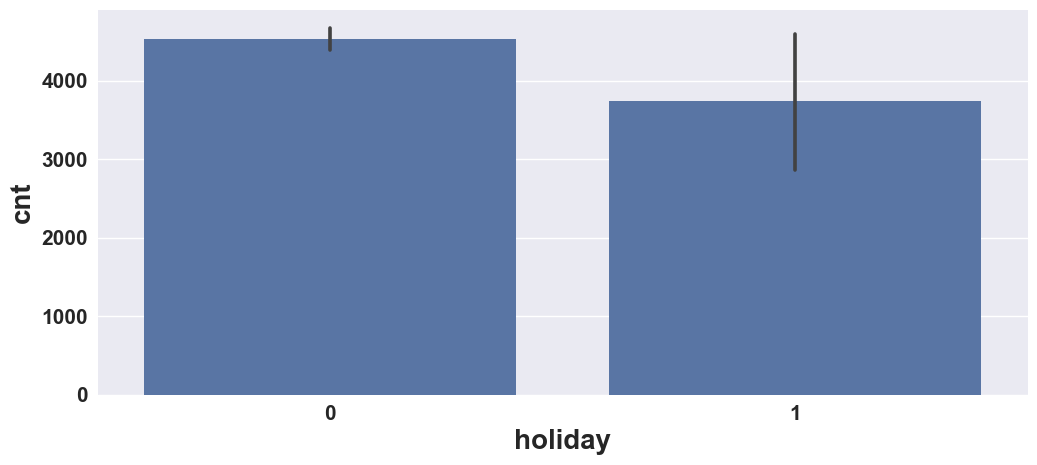

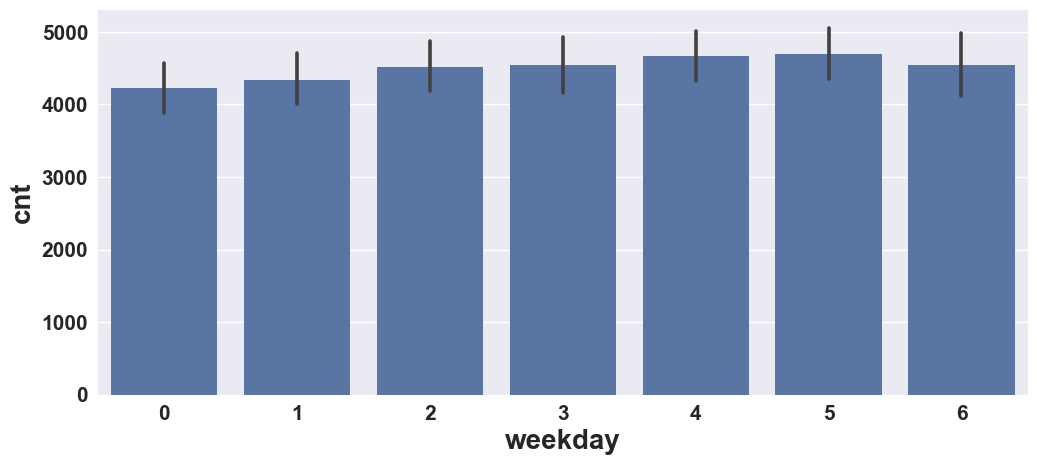

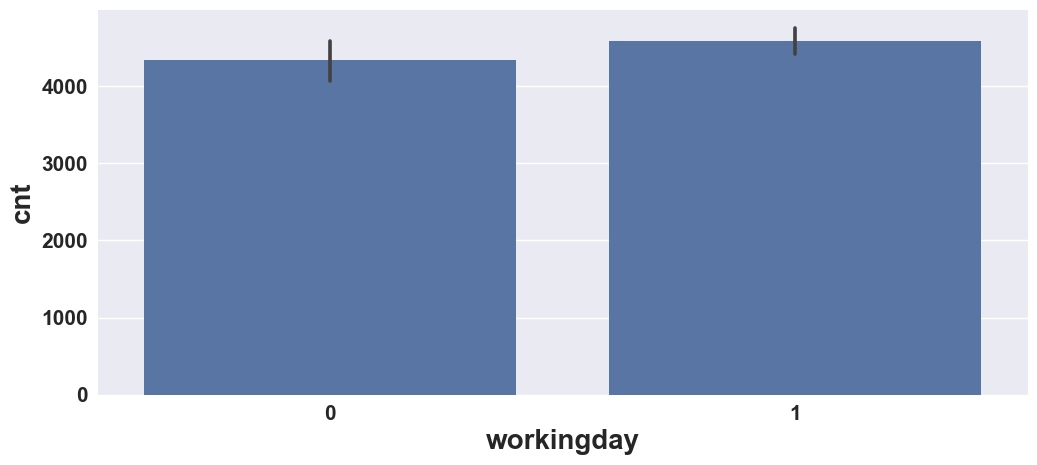

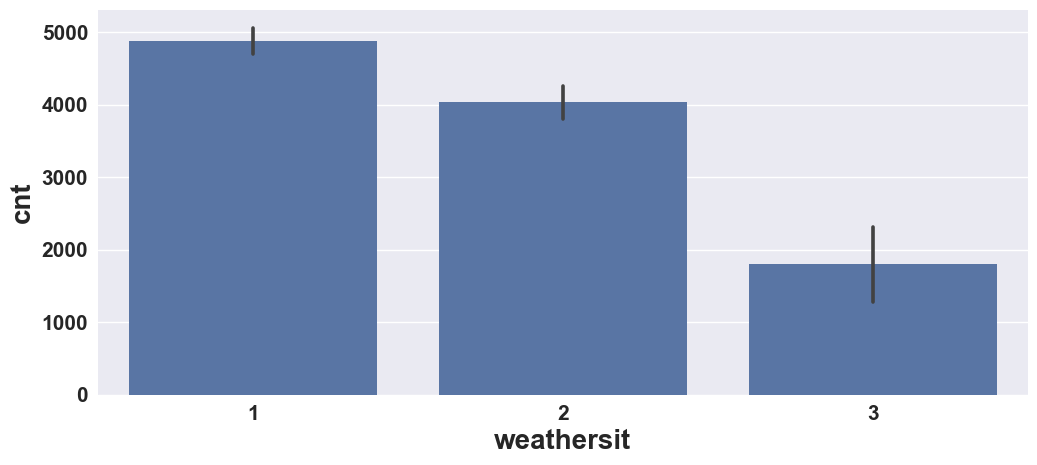

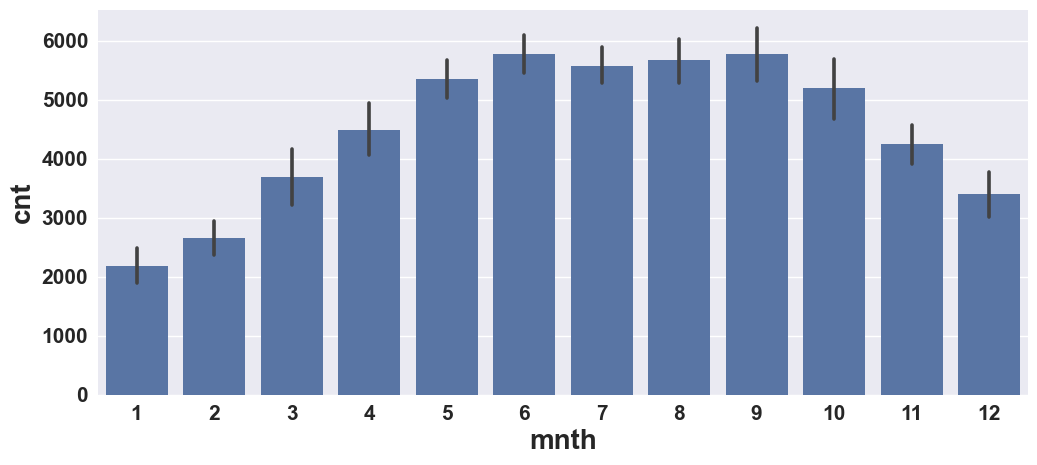

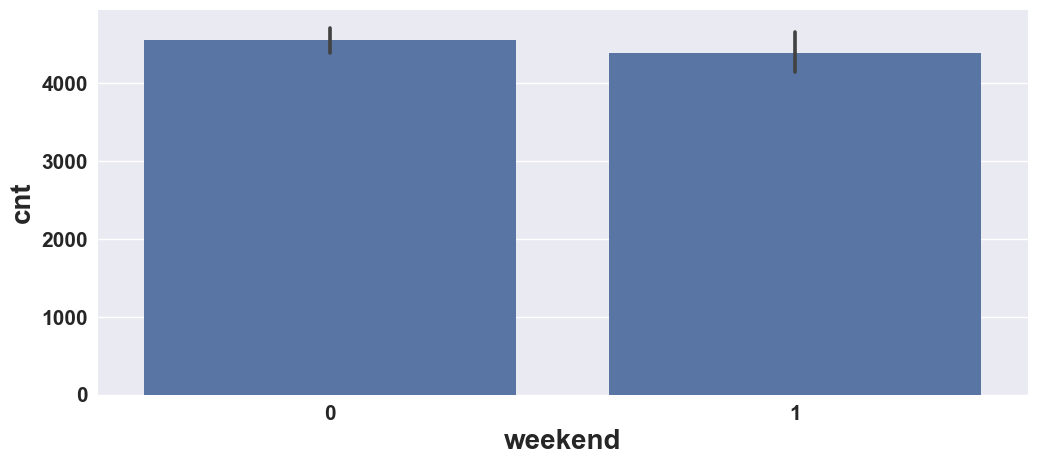

In [29]:
# plot barchart plot for each categorical columns with respect to target variable to get insights
for col in categorical_cols:
    fig = plt.figure(figsize=(12, 5))
    ax = fig.gca()
    sns.barplot(x = df[col],y = df['cnt'])

## Observations from Above Charts :-

1. Season vs Count
* Demand is lowest in Season 1 (winter).
* Peaks in Season 3 (summer).
* Season has a strong impact on bike rentals

2. Year vs Count
* Year 1 shows much higher demand than Year 0.
* Indicates growth in overall bike usage.

3. Holiday vs Count
* Fewer bikes are rented on holidays.
* People use bikes more on regular days.

4. Weekday vs Count
* Counts are fairly similar across weekdays.
* No major weekday effect — usage is consistent.

5. Workingday vs Count
* Slightly higher demand on working days vs non-working days.
* Suggests commuting usage.

6. Weather Situation vs Count
* Demand is highest in clear weather (1).
* Drops in cloudy/mist (2).
* Very low when weather is bad (3).

7. Month vs Count
* Low in winter (Jan–Feb).
* Rises from spring, peaks around June–September.
* Drops again after October.

8. Weekend vs Count
* Weekend rentals slightly lower than weekdays.
* Users mainly ride for work-related travel.

## Dependent Variable (Bike Rent Count) Vs Categorical Columns

Text(0.5, 1.0, 'Bike Rental Trend according to Day on Holiday / No Holiday')

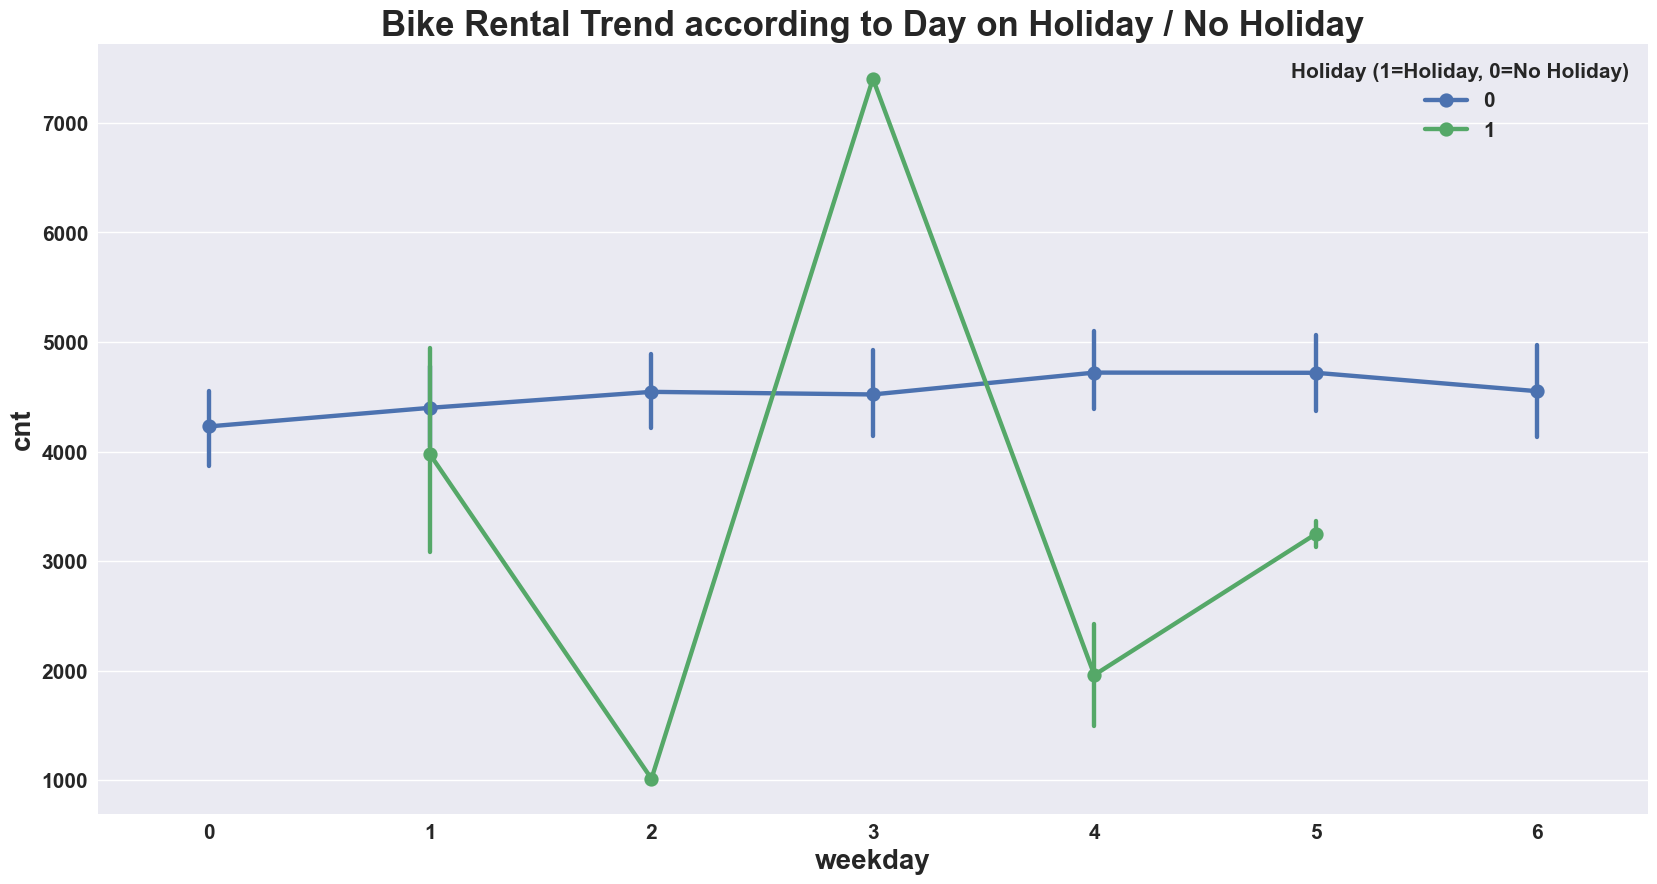

In [30]:
plt.figure(figsize=(20,10))
sns.pointplot(x = df['weekday'],y = df['cnt'],hue = df['holiday'])
plt.legend(title="Holiday (1=Holiday, 0=No Holiday)")
plt.title("Bike Rental Trend according to Day on Holiday / No Holiday")

### Observations :-
*  On non-holidays, bike rentals remain steady throughout the week — likely due to regular office or college commuters.
*  On holidays, rentals fluctuate sharply, showing less consistent usage — probably because people travel for leisure or special plans rather than routine.
*  There’s a huge spike on weekday 3 (holiday = 1) — could be due to a special event or mid-week holiday, leading to higher recreational rides.
*  On most other holidays, rentals are lower than normal weekdays, indicating less commuting activity.
*  Overall, non-holidays show stable patterns, while holidays show unpredictable spikes and drops in bike usage.

Text(0.5, 1.0, 'Bike Rental Trend according to day on Working day / No Working day')

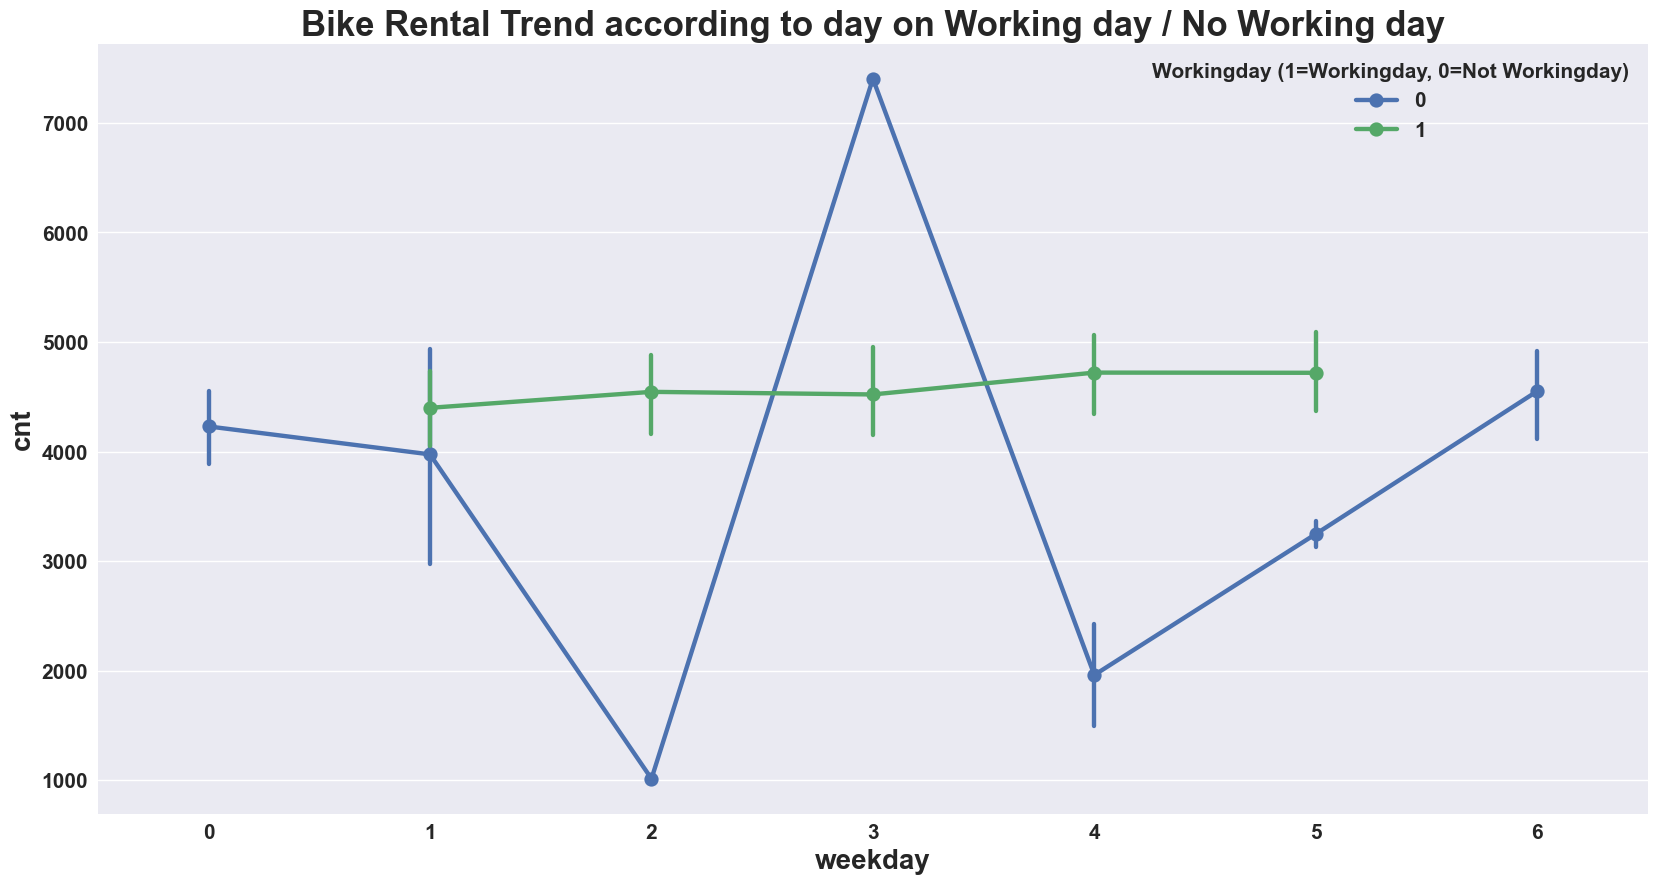

In [31]:
# Bike Rental trend with respect to day on working day.
plt.figure(figsize=(20,10))
sns.pointplot(x = df['weekday'],y = df['cnt'],hue = df['workingday'])
plt.legend(title="Workingday (1=Workingday, 0=Not Workingday)")
plt.title("Bike Rental Trend according to day on Working day / No Working day")

### Observations :-
*  On working days (green line = 1), the number of bike rentals stays fairly consistent throughout the week, showing that people use bikes regularly for office or college commutes.
*  On non-working days (blue line = 0), the rental trend is highly variable — some days have very low counts, while others show sharp spikes.
*  A significant peak appears around weekday 3 (non-working day) — this could be due to weekend outings or special events leading to more leisure rides.
*  Rentals drop sharply on weekday 2 and weekday 4 (non-working days), suggesting less outdoor activity or unfavorable conditions on those days.
*  Overall, working days show stable, moderate rentals, while non-working days show unpredictable patterns — indicating that commuting drives steady demand, whereas leisure usage varies by day.

Text(0.5, 1.0, 'Bike Rental Trend according to Seasons on days')

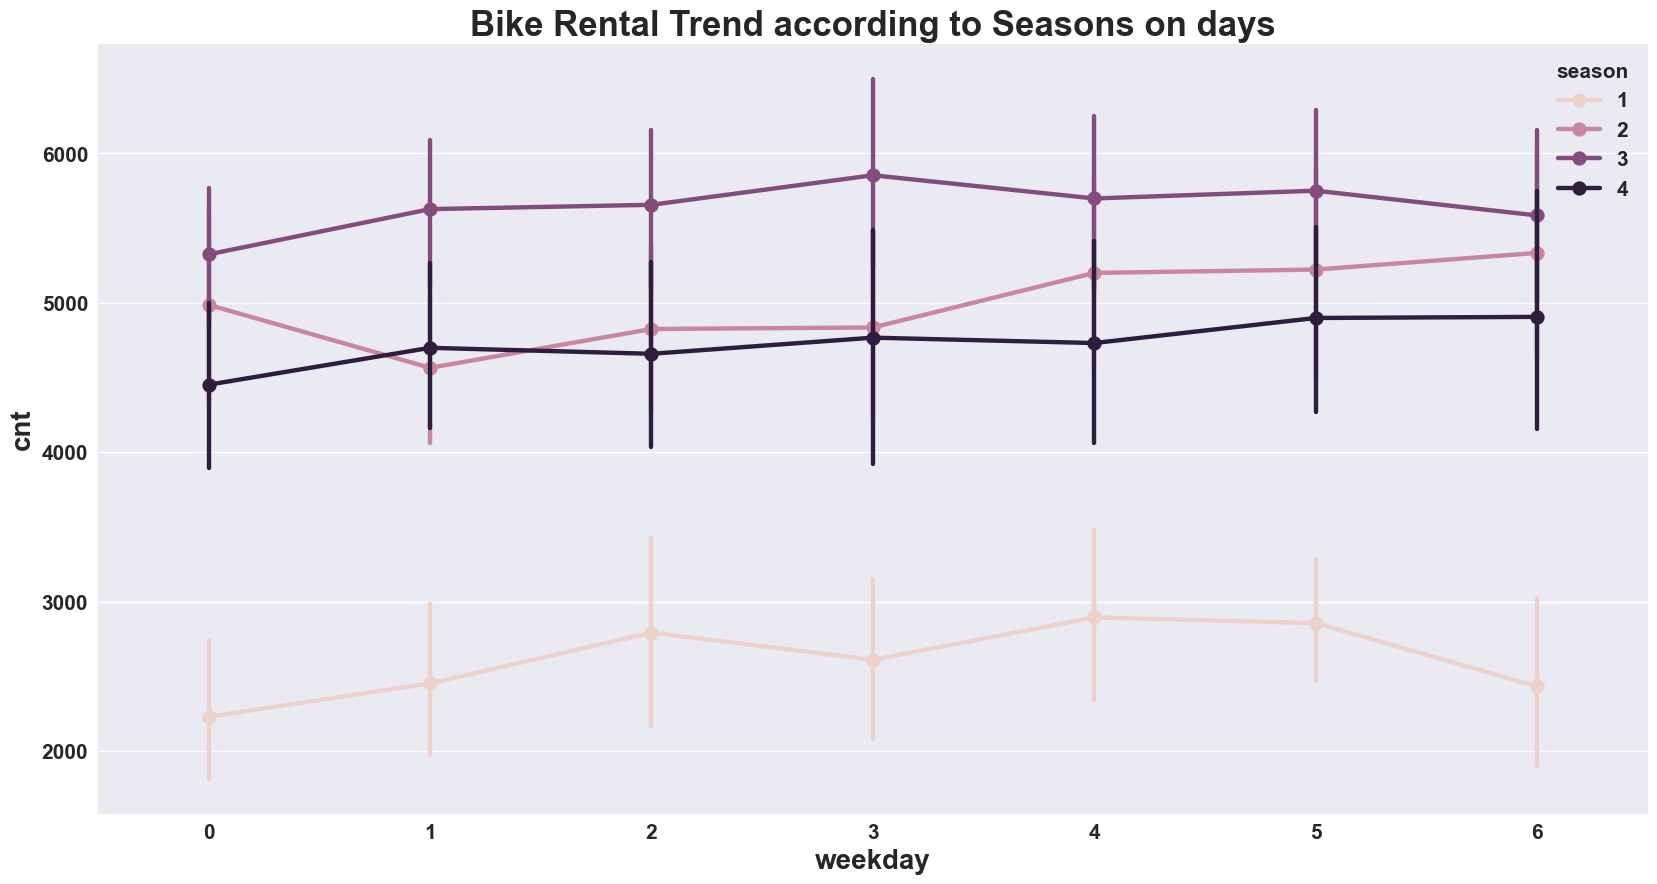

In [32]:
plt.figure(figsize=(20,10))
sns.pointplot(x = df['weekday'],y = df['cnt'],hue = df['season'])
plt.title("Bike Rental Trend according to Seasons on days")

### Observations:-
 *  Season 3 (Fall season) shows the highest number of rentals throughout the week (purple line) , when weather is pleasant and ideal for biking.
 *  Season 1 (Spring season) has the lowest rentals (light cream line), likely due to cold or harsh weather conditions reducing bike usage.
 *  Seasons 2(Summer) and 4(Winter) show moderate and steady rental activity, with values between 4500–5200, indicating balanced riding conditions.
 *  Across all seasons, the weekday pattern remains fairly consistent, suggesting that seasonal changes impact rentals more than weekday differences.
 *  The variation between days is small, implying people ride bikes regularly across the week regardless of the specific weekday, but overall volume depends heavily on the season.

Text(0.5, 1.0, 'Bike Rental Trend according to Seasons on Months')

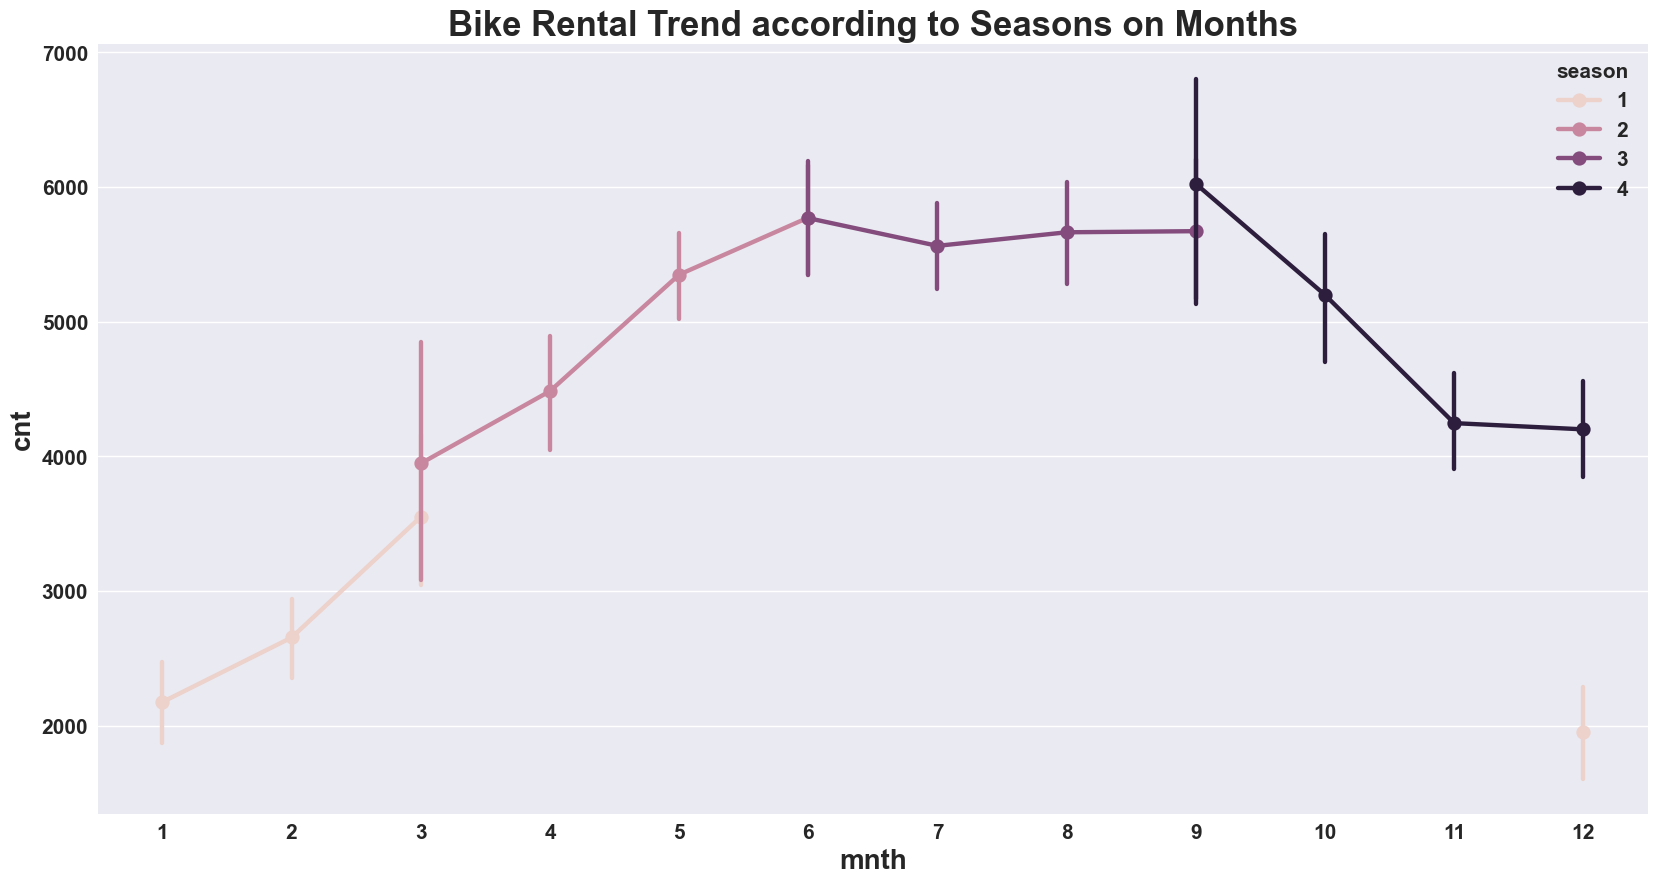

In [33]:
plt.figure(figsize=(20,10))
sns.pointplot(x = df['mnth'],y = df['cnt'],hue = df['season'])
plt.title("Bike Rental Trend according to Seasons on Months")

### Observations:-
*  Rentals rise continuously from winter to summer.
*  Months Jan–Mar show the lowest usage, especially January.Rentals gradually increase from Jan → Mar but stay below other seasons.
*  Months Apr–Jun see a sharp rise in usage.Bike rentals jump significantly from March to June.
*  Months Jul–Sep show the maximum bike demand.Rentals remain consistently high throughout these months.
*  Rentals stay high in October, then drop sharply in November and December.December marks the beginning of low winter usage again.
* Clear and logical pattern where weather/temperature influences demand: Cold → fewer rentals , Warm → more rentals

## Distribution of Target Variable

<Axes: xlabel='cnt'>

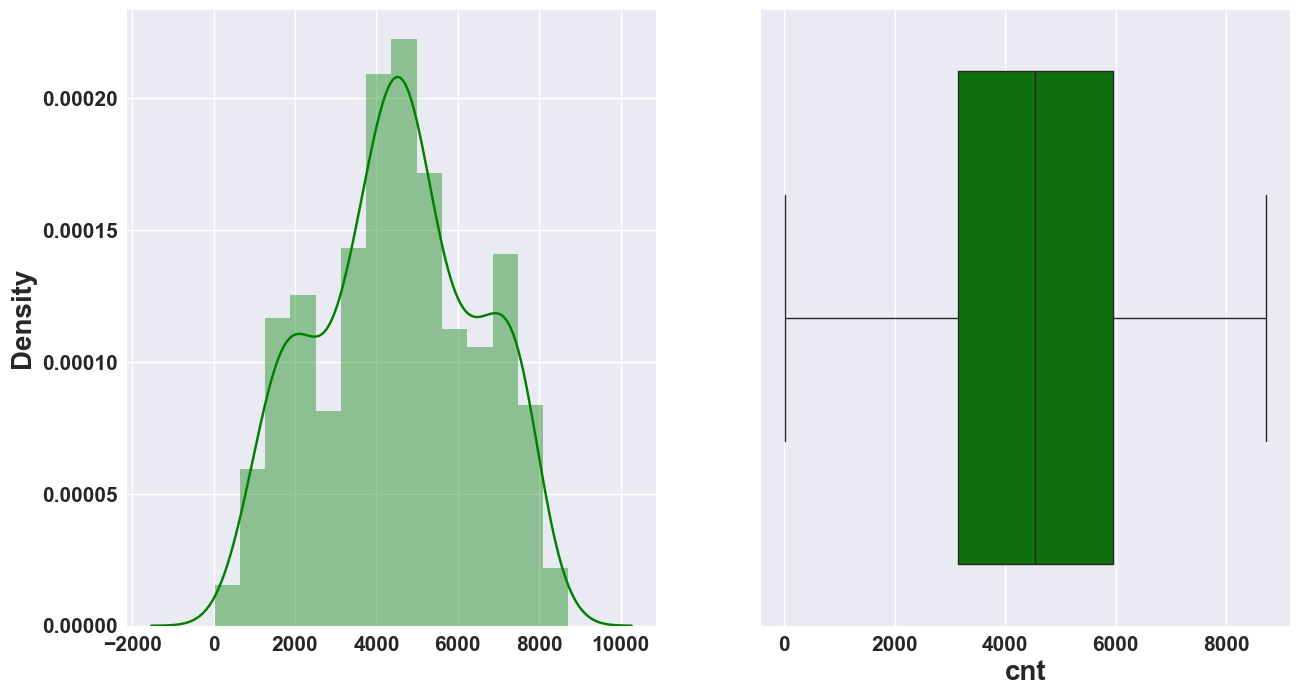

In [34]:
f, axes = plt.subplots(1, 2,figsize=(15,8))
sns.distplot(x= df['cnt'],color='g',ax=axes[0])
sns.boxplot(x = df['cnt'],color='g',ax=axes[1])


* No significant outliers are visible in the box plot — most observations fall within a normal range.

### Univariate Analysis

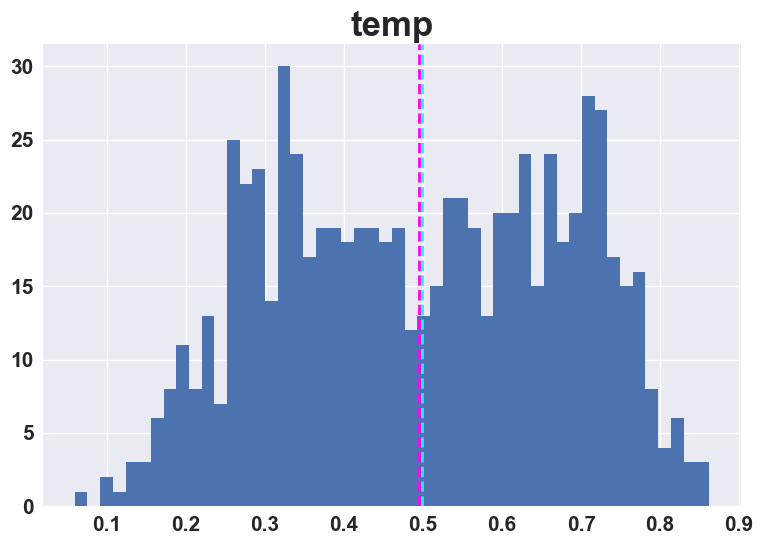

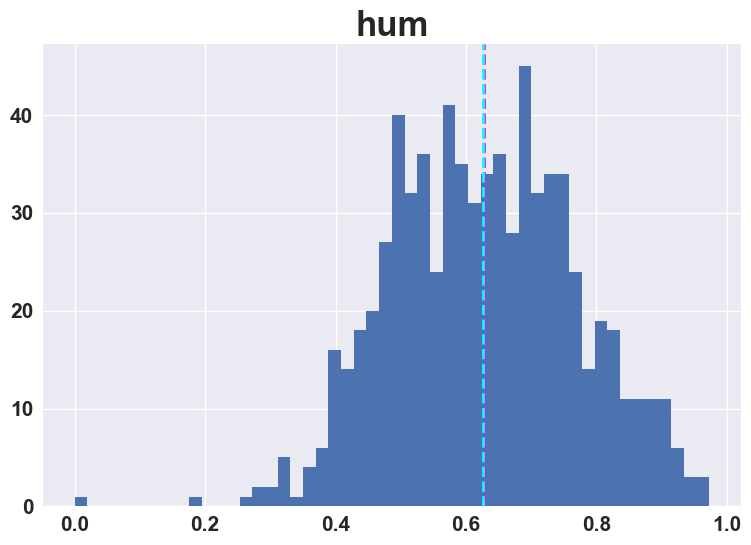

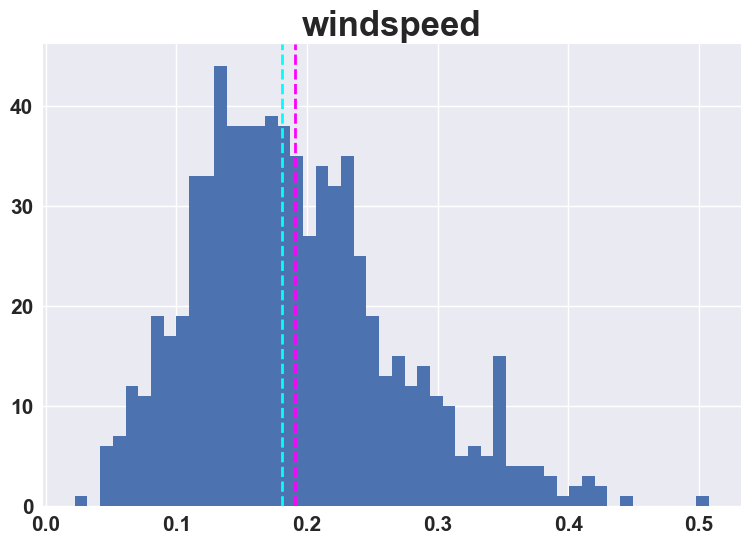

In [35]:
for col in numeric_cols:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins = 50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    plt.title(col)
plt.show()

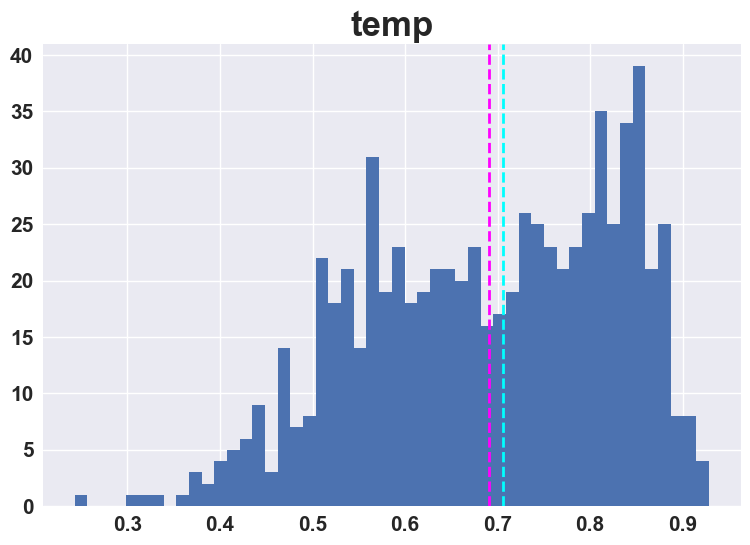

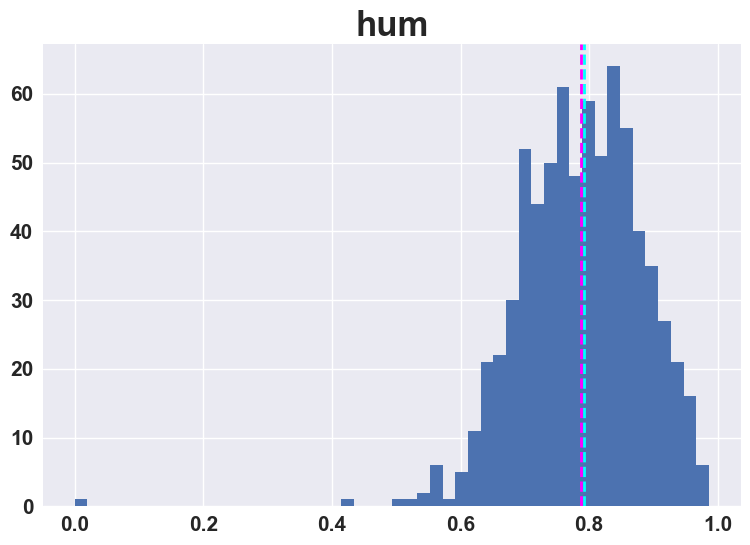

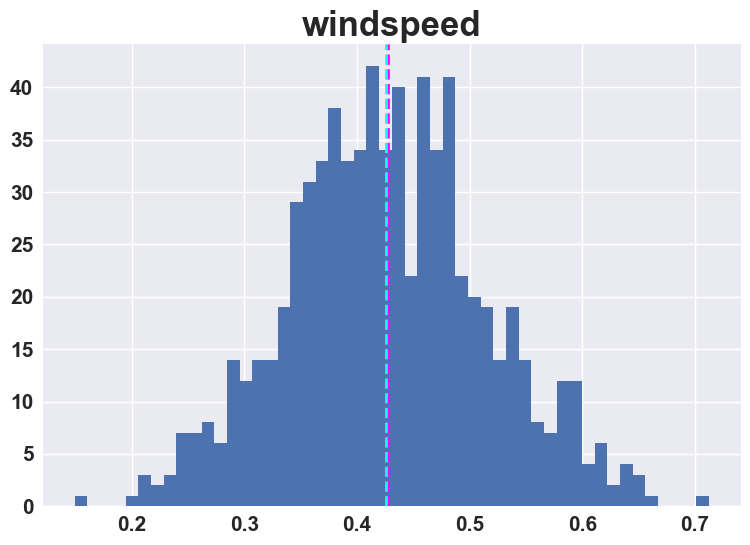

In [36]:
# Normalizing The variables using squre root method.
for col in numeric_cols:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.sqrt(df[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

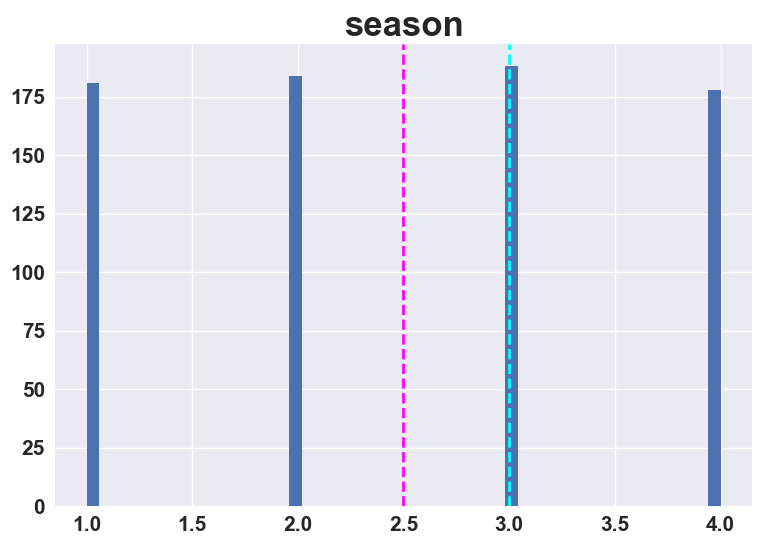

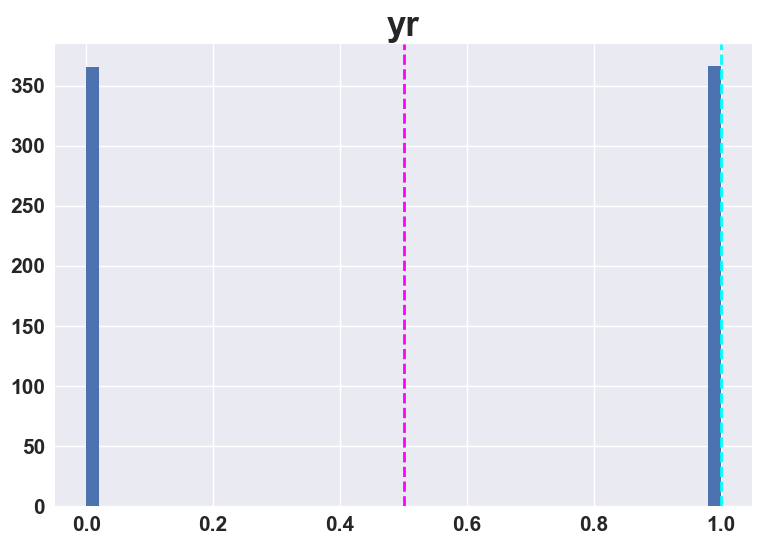

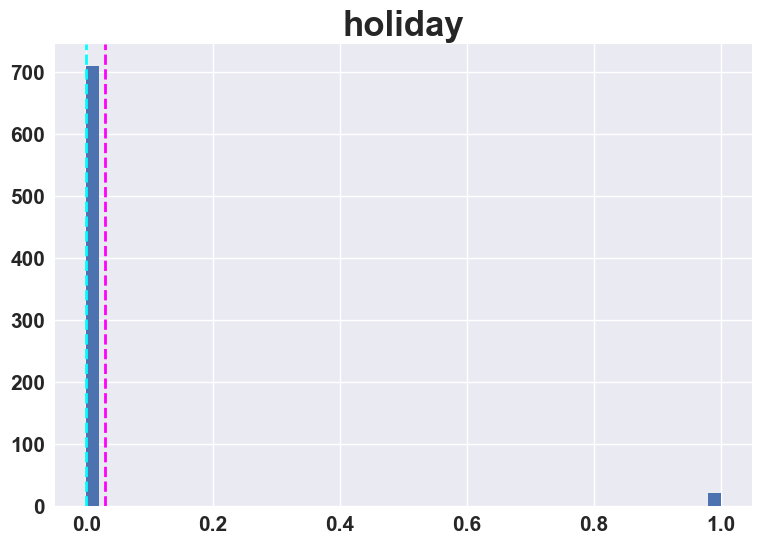

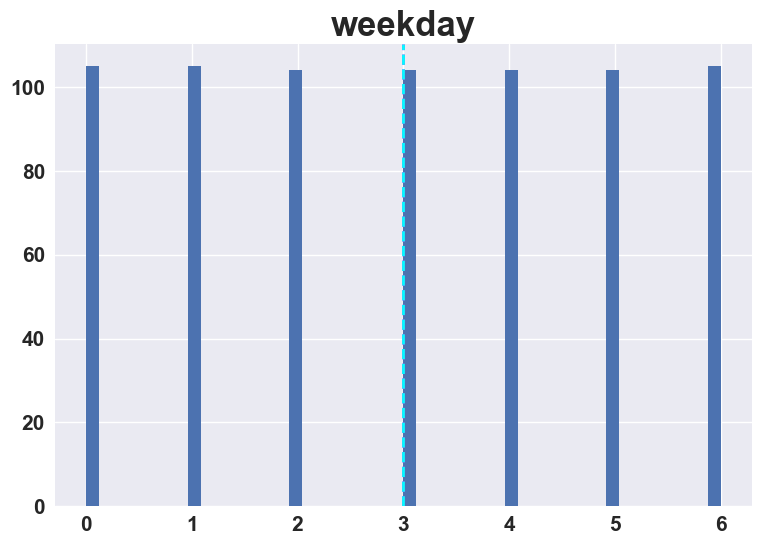

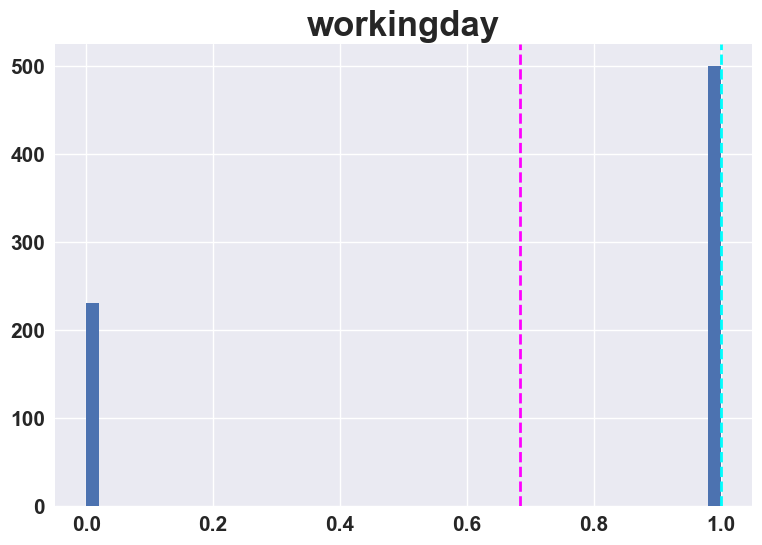

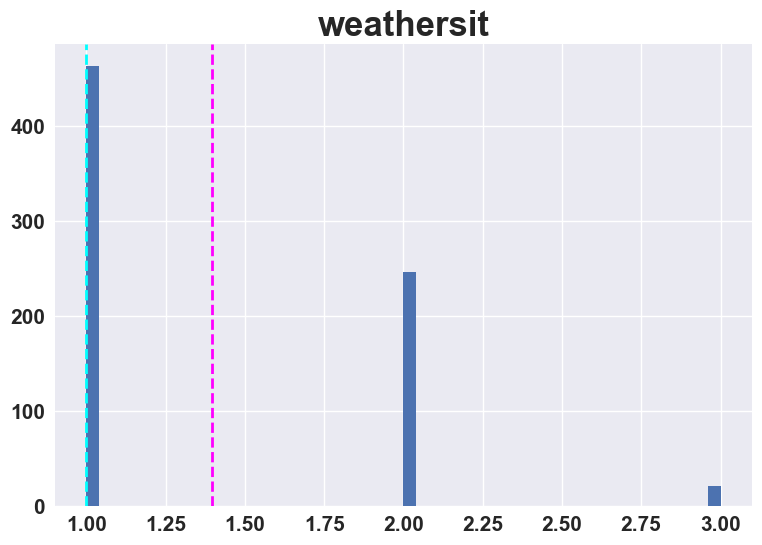

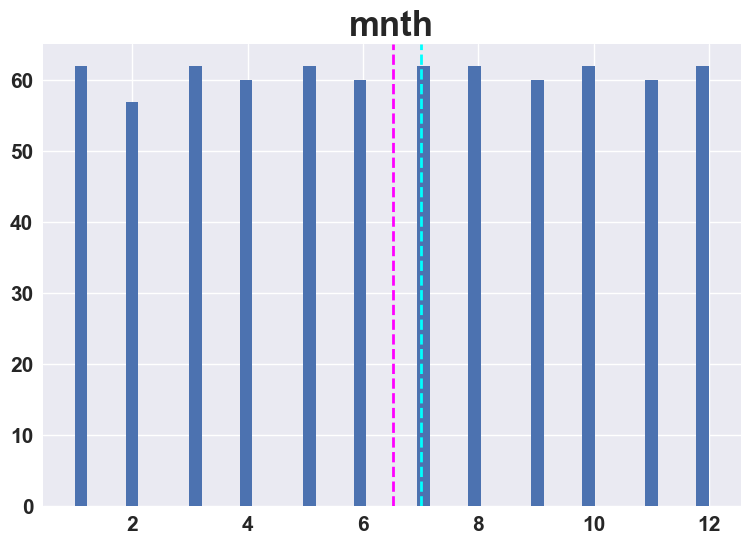

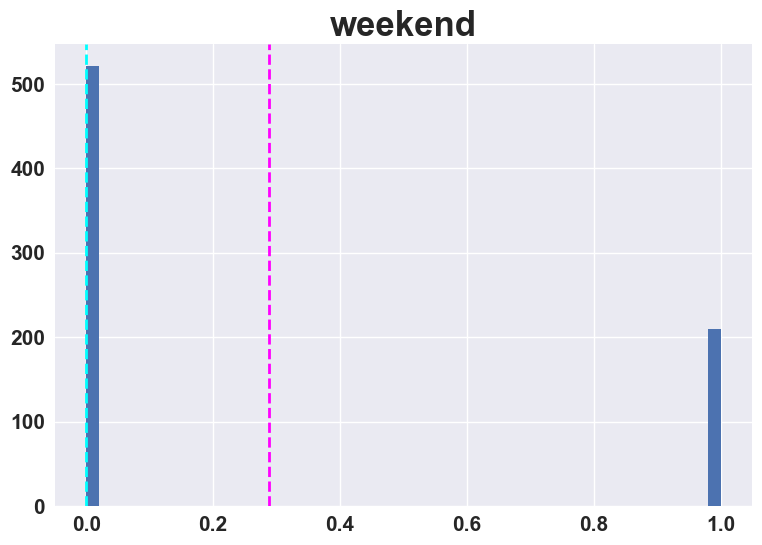

In [37]:
for col in categorical_cols:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins = 50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    plt.title(col)
plt.show()

### Bivariate Analysis

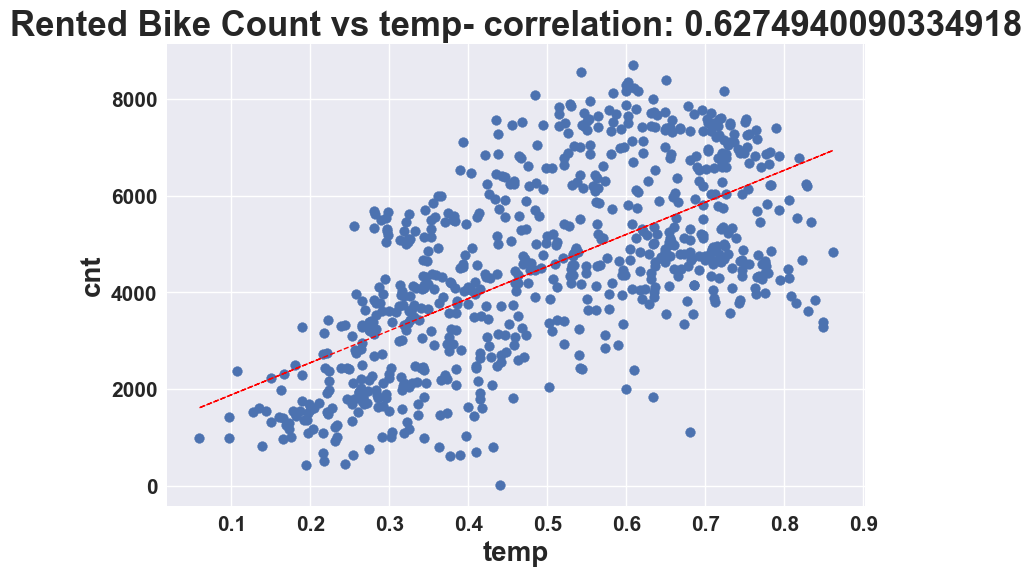

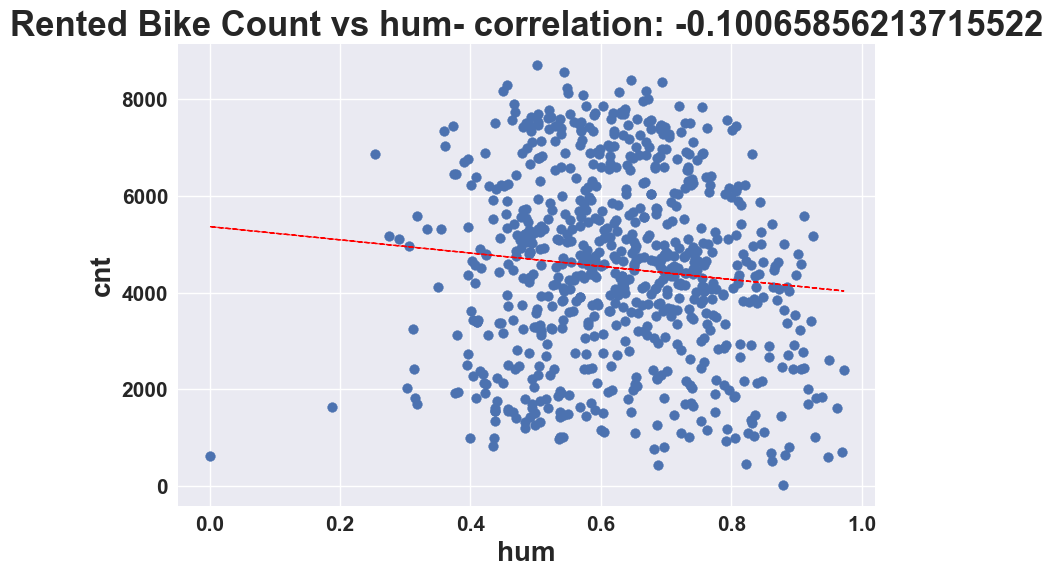

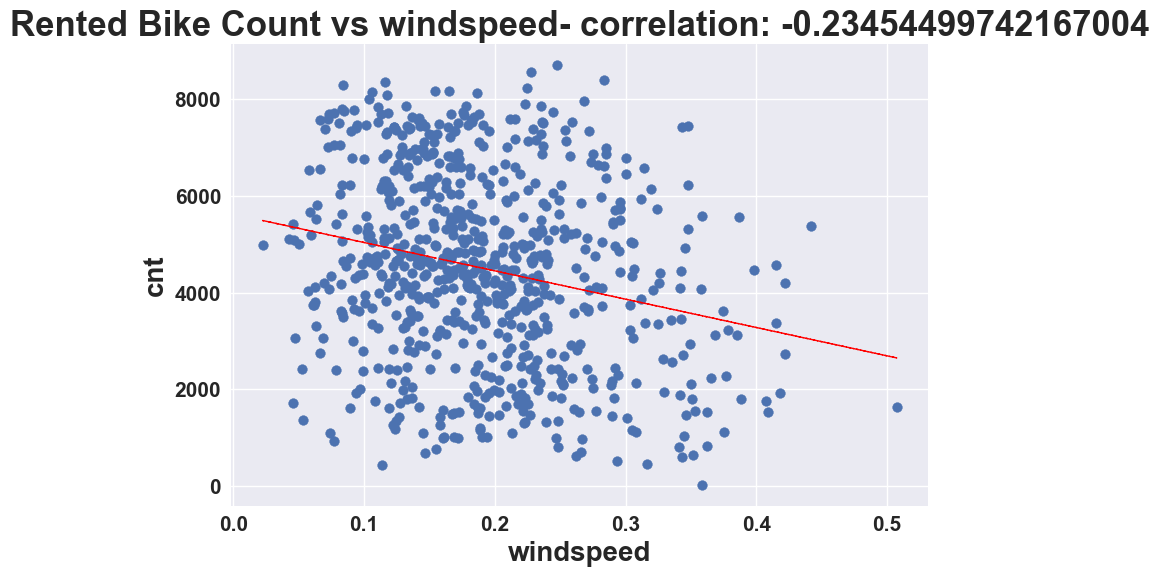

In [38]:
for col in numeric_cols:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['cnt']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('cnt')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['cnt'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

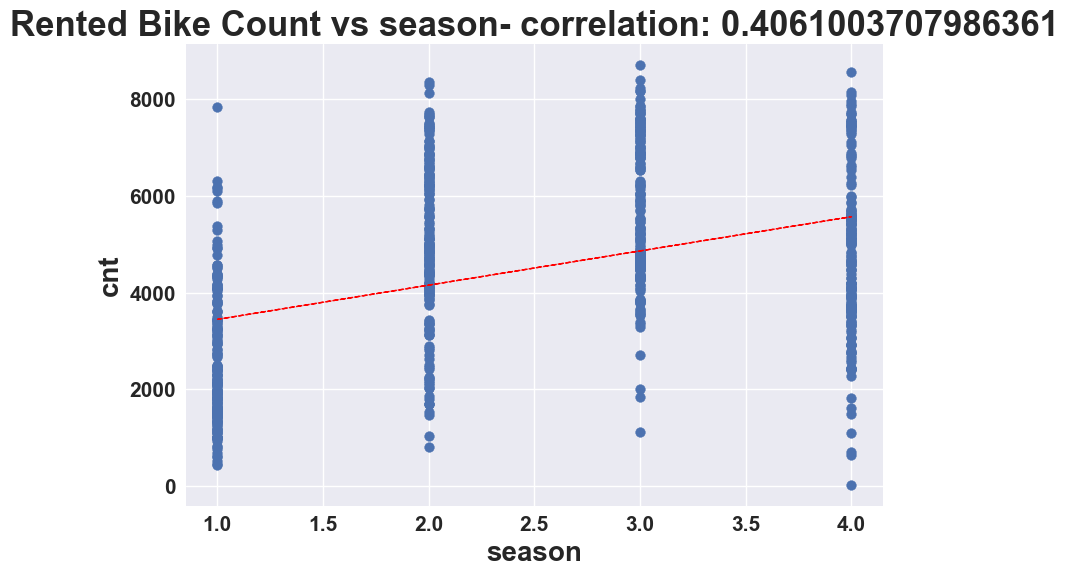

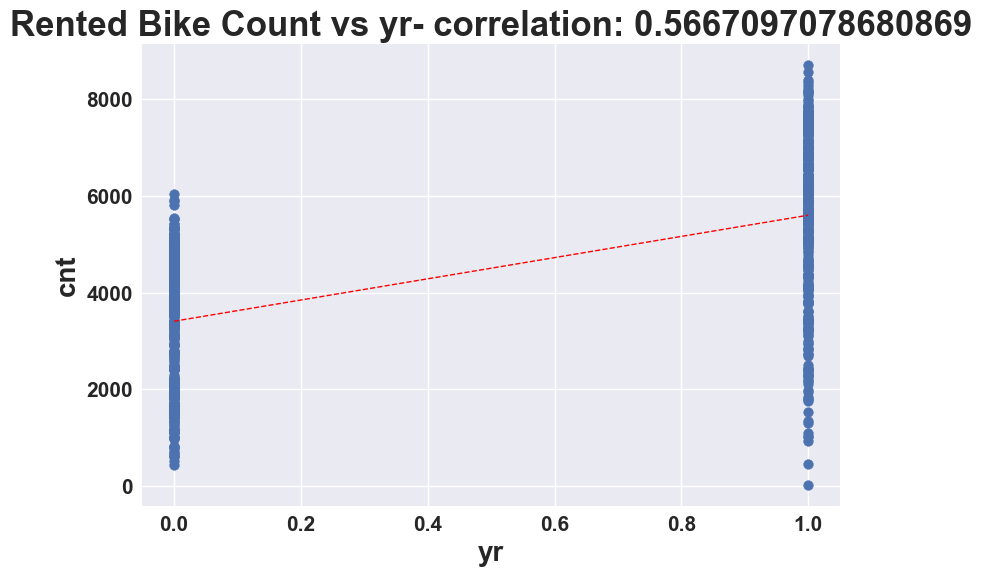

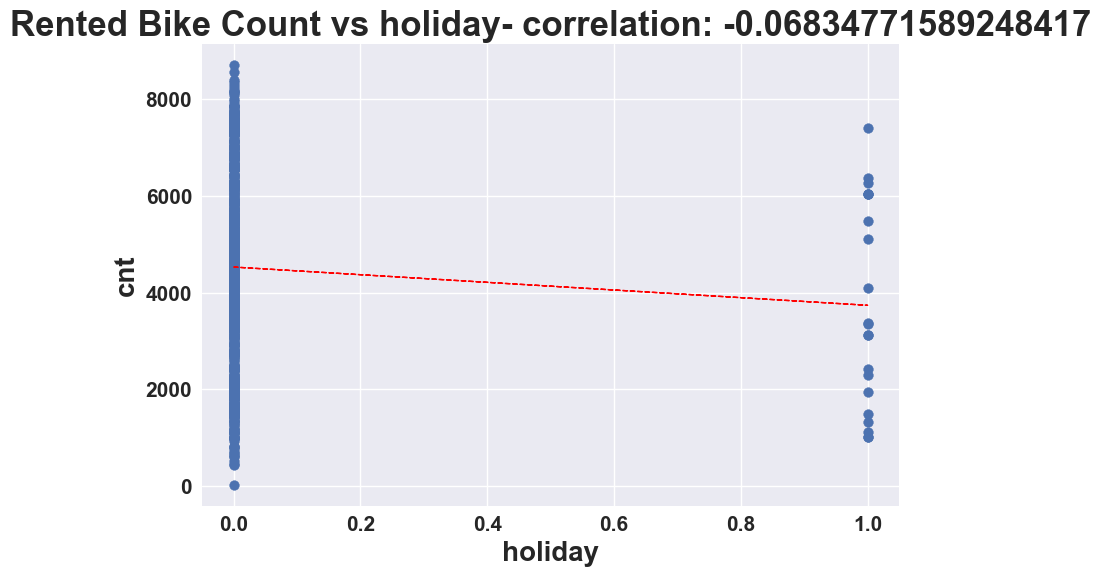

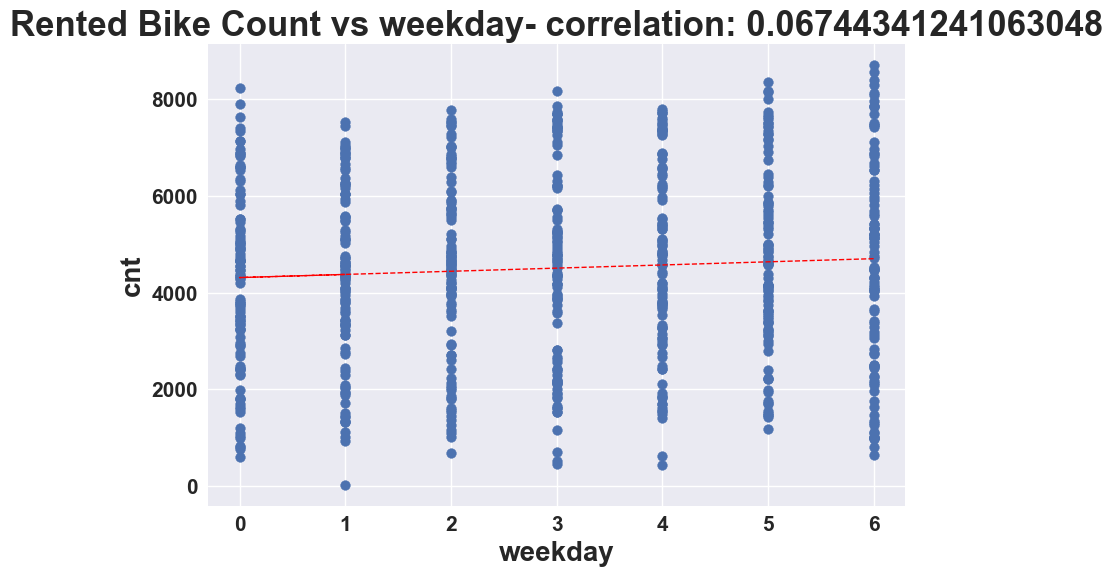

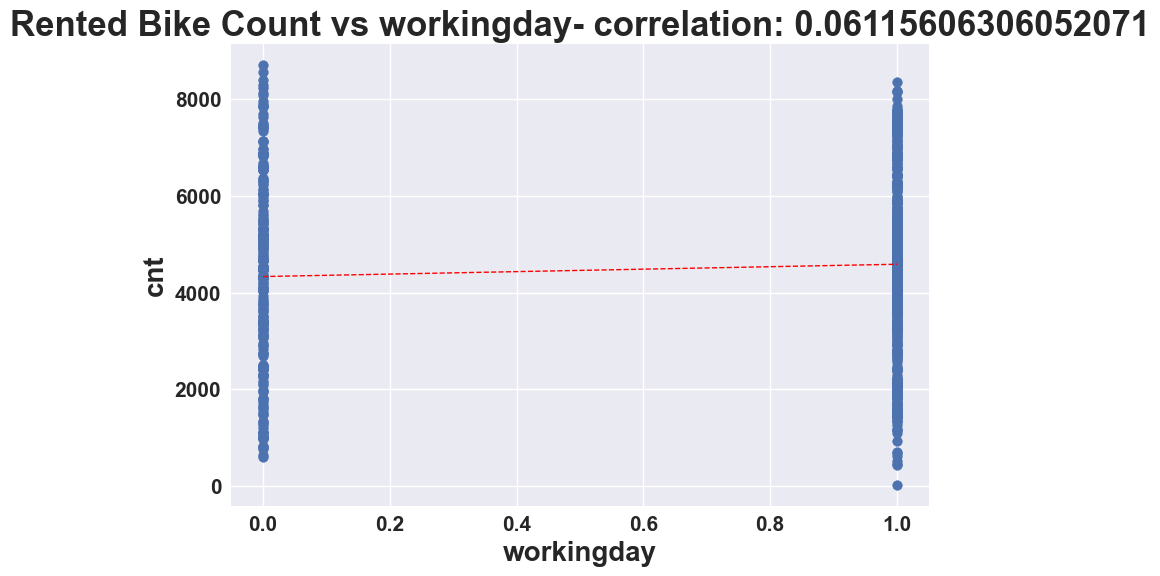

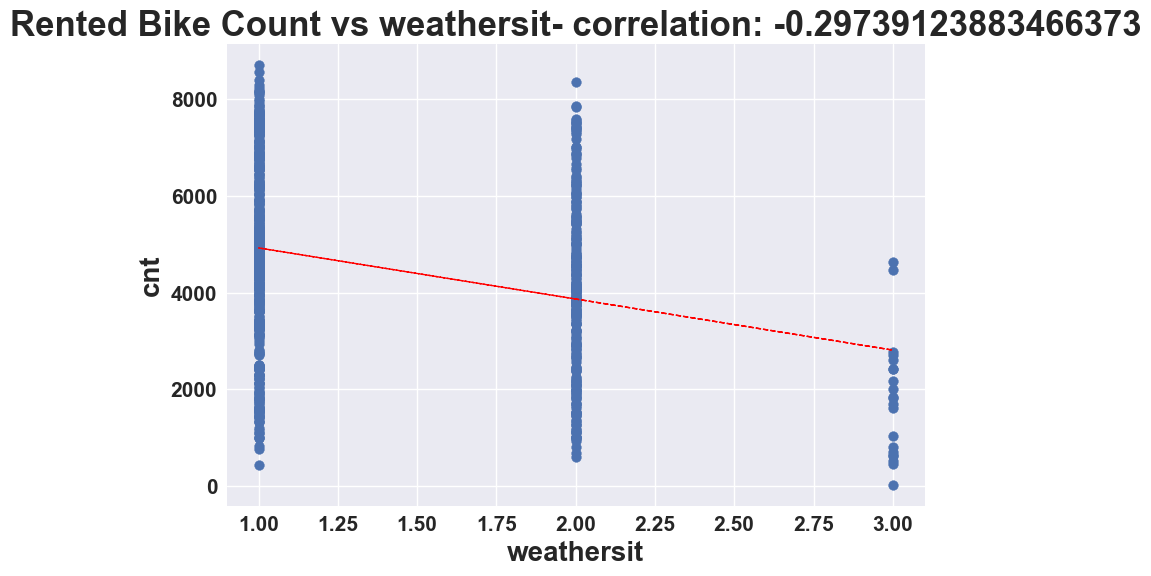

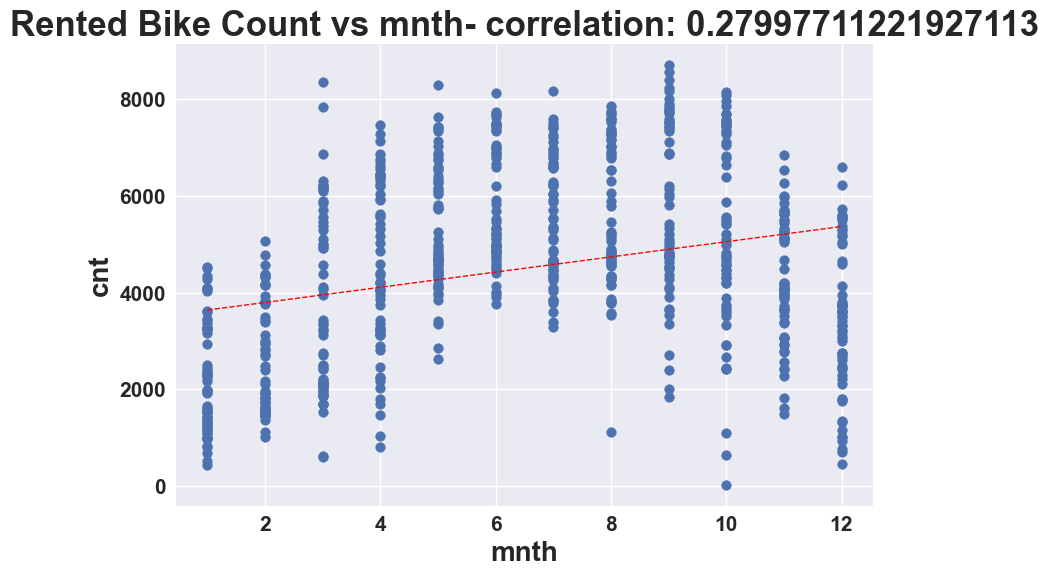

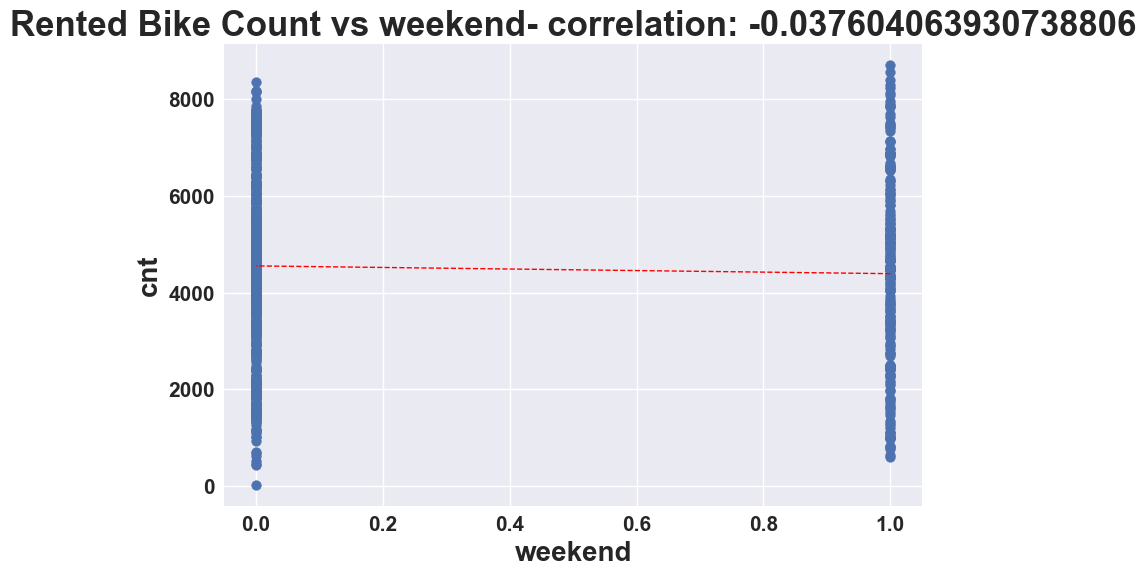

In [39]:
for col in categorical_cols:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['cnt']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('cnt')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['cnt'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

# Observations:-

## Numeric Columns :-

### 1. Temperature vs Count (corr = +0.62)
Strong positive correlation.
As temperature increases, bike rentals increase significantly.
Warm weather encourages more bike usage.

### 2. Humidity vs Count (corr = –0.10)
Very weak negative correlation.
Higher humidity slightly reduces rentals, but the effect is minimal.
Rentals mostly unaffected by humidity.

### 3. Windspeed vs Count (corr = –0.23)
Moderate negative correlation.
Higher windspeed tends to reduce bike rentals.
Strong winds are less comfortable for riding.

## Categorical Columns:-

### 4. Season vs Count (corr = +0.40)
Moderate positive correlation.
Rentals increase across seasons from winter → summer.
Season strongly influences user behavior.

### 5. Year vs Count (corr = +0.56)
Strong positive correlation.
Rentals are much higher in the second year (1) than the first year (0).
Indicates an overall growth trend in bike usage.

### 6. Holiday vs Count (corr = –0.06)
Very weak negative correlation.
Rentals slightly lower on holidays, but the impact is negligible.

### 7 Workingday vs Count (corr = +0.06)
Very weak positive correlation.
Slightly higher rentals on working days, but overall impact is minimal.

### 8. Weekday vs Count (corr = +0.06)
No meaningful correlation.
Rentals remain fairly constant across all days of the week.
Weekday has almost no effect on bike usage.

### 9 Weekend (corr = –0.03)
Minimal negative correlation.
Rentals on weekends are nearly similar to weekdays.

### 10. Weather Situation vs Count (corr = –0.29)
Moderate negative correlation.
Worse weather (e.g., mist, rain) significantly reduces rentals.
Clear weather shows the highest usage.

### 11. Month vs Count (corr = +0.28)
Moderate positive correlation.
Rentals tend to increase from early months to mid-year then decline.
Shows the seasonal influence across months.

<Axes: >

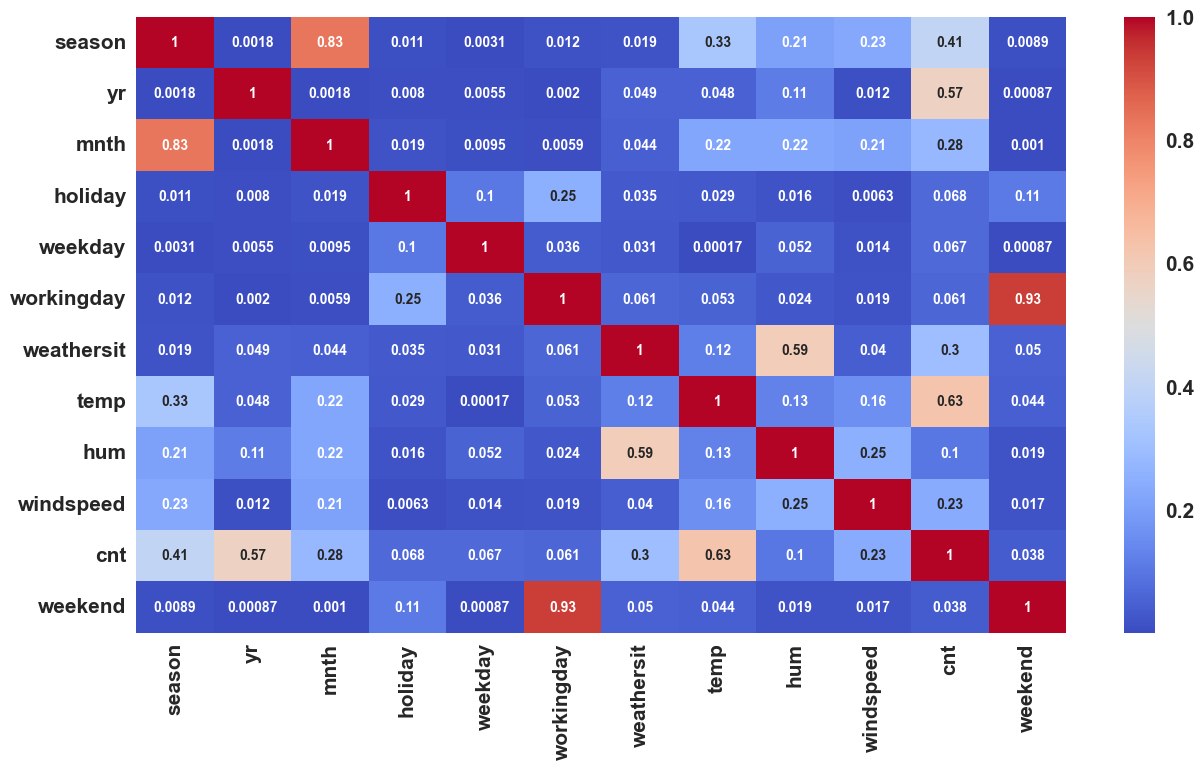

In [40]:
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [41]:
df = pd.get_dummies(df, columns=['season', 'mnth', 'weekday', 'weathersit'], drop_first=True)

In [42]:
from sklearn.preprocessing import MinMaxScaler


num_cols = ['temp','hum', 'windspeed']
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [43]:
df.to_csv("preprocessed_day.csv", index=False)
print("Preprocessed file saved as preprocessed_day.csv")

Preprocessed file saved as preprocessed_day.csv
